# Quickstart

This guide will help you get started with using ``sinflow`` to learn a probability distribution from data by mapping it to a normal distribution.

## Generating data

First, let's generate some data. We will use a simple function to generate some data that is not linearly separable.

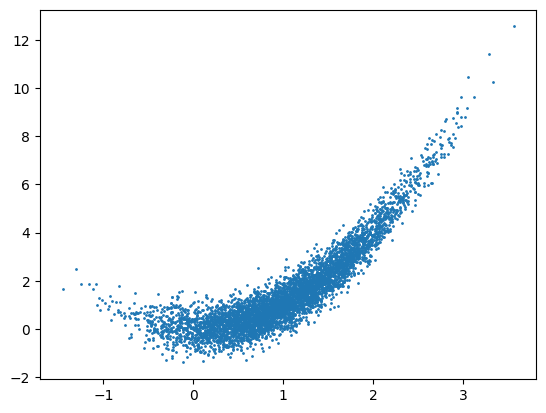

In [1]:
# import necessary libraries
import sinflow as sf
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
def make_rosenbrock(n_samples, a=1.0, b=2.0):
    z1 = np.random.randn(n_samples)
    z2 = np.random.randn(n_samples)

    sigma_x = 1 / np.sqrt(2)
    sigma_y = 1 / np.sqrt(2 * b)
    
    x = a + sigma_x * z1
    y = x**2 + sigma_y * z2
    return np.vstack([x, y]).T

x = make_rosenbrock(5000)

# plot the dataset
plt.scatter(x[:, 0], x[:, 1], s=1)
plt.show()

## Fitting a normalizing flow

Next, we will fit a normalizing flow to the data

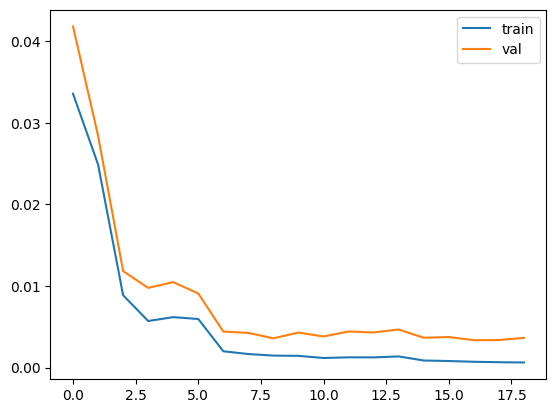

In [2]:
# Define the flow
flow = sf.Flow()

# Train the flow
flow.fit(x)

# Plot training and validation loss
plt.plot(flow.train_history, label='train')
plt.plot(flow.val_history, label='val')
plt.legend()
plt.show()

## Forward transformation

We can see how the data are transformed by the normalizing flow using the `forward` method.

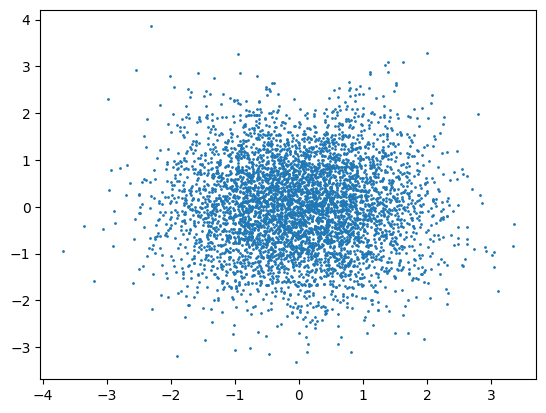

In [3]:
u, log_det = flow.forward(x)

# plot the transformed dataset
plt.scatter(u[:, 0], u[:, 1], s=1)
plt.show()

## Inverse transformation

We can also see how the data are transformed back to the original space using the `inverse` method.

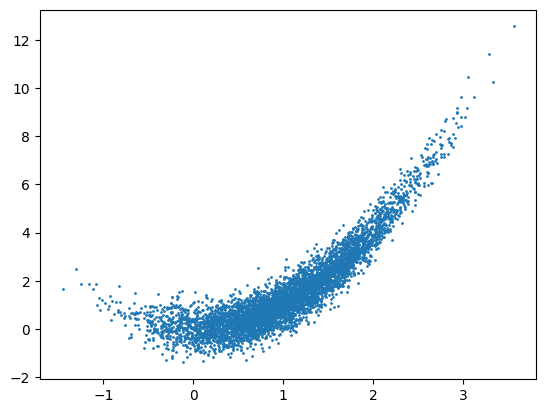

In [4]:
x_reconstructed, log_det_reconstructed = flow.inverse(u)

# plot the reconstructed dataset
plt.scatter(x_reconstructed[:, 0], x_reconstructed[:, 1], s=1)
plt.show()

## Sampling

We can sample from the learned distribution using the `sample` method.

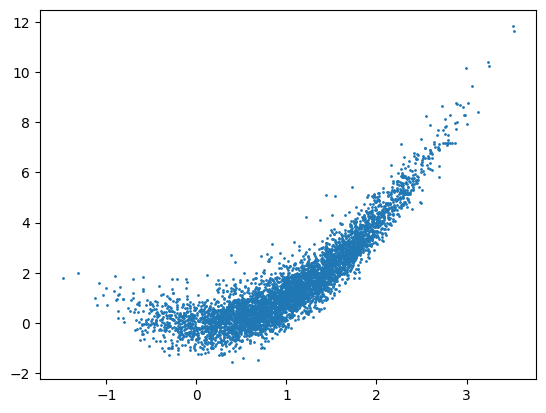

In [5]:
samples = flow.sample(5000)

# plot the samples
plt.scatter(samples[:, 0], samples[:, 1], s=1)
plt.show()

## Evaluating the learned distribution

We can evaluate the learned distribution using the `log_prob` method.

In [6]:
logprob = flow.log_prob(x)

print(logprob)

[-0.96885058 -0.88138703 -2.28181486 ... -1.32028241 -3.05585185
 -1.33444909]
